Kelas : Leibiniz

Anggota Kelompok 9 :

1.   Dina Puspitasari
2.   Dafani Alifia Rasyada
3.   Lutfia Hayatun Nufus
4.   Saidah Asro FZ
5.   Silvia Damayanti
6.   M Athanabil Andi Fawazdhia

#**Analisis Sentimen Reviews Pengguna Dana**

Dana adalah platform dompet digital agar mempermudah setiap melakukan transaksi tanpa harus membawa uang, hanya cukup melakukannya dengan isi saldo. Untuk mengetahui reputasi Dana, dapat melihat dari berbagai ulasan usersnya baik berupa tanggapan, kritik dan apresiasi. Analisa ulasan dapat diketahui dengan mudah melalui jumlah bintang yang diberikan oleh users. Pemberian bintang pada ulasan tidak selalu dapat menggambarkan isi dari
ulasan, hal ini dibuktikan adanya pemberian jumlah bintang yang tinggi, tetapi isi dari ulasannya bernilai
negatif. Analisis sentimen pada isi ulasan dapat memberikan informasi yang lebih dalam tentang
penilaian pengguna Dana.

#Problem Scoping

`What`

Apa tema yang diambil?
- Analisa sentimen terhadap pengguna Dana
- Tingkat Kepuasan konsumen terhadap Dana


`Why`

Mengapa 'Analisis Sentimen Reviews Pengguna Dana' perlu dibuat?
- Diperlukan Analisis Sentimen karena untuk mengambil kebijakan juga perlu mengetahui review dari konsumen

`Where`

Dimana seseorang mengalami masalah ini?
- Saat menggunakan aplikasi dana

`Who`

Siapakah yang akan menggunakan 'Analisis Sentimen Reviews Pengguna Dana' tersebut?
- Petinggi/Pemilik Saham Dana yang menjalankan Dana

#Import Package

In [ ]:
import pandas as pd             
import numpy as np

#Import Reguler Expression 
import re

import string

#NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Sastrawi
!pip install sastrawi #Library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from datetime import datetime

# Visualization 
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 209 kB 8.8 MB/s 


#Data Acquisition

Pada tahapan ini, menggunakan teknik scraping pada Google Play Store yang bertujuan untuk pengambilan data secara otomatis dari reviews pengguna aplikasi Dana

##Scraping Dana dari Google Play Store

Data yang akan digunakan merupakan ulasan yang ditulis dari pengguna Dana pada Google Play Store. Langkah-langkahnya yaitu:

1. Install package Google Play Scraper yaitu ketik !pip install google-play-scraper 

2. Import package yang dibutuhkan berupa from google_play_scraper import app yaitu memulai scraping pada aplikasi Dana dan from google_play_scraper import Sort, reviews yaitu untuk mengambil data reviews users 

3. Mencari ID aplikasi, yaitu id.dana. Kemudian untuk lang dan country, hanya diambil data Indonesia, maka ketik id



In [ ]:
!pip install google-play-scraper    #Install package

In [ ]:
from google_play_scraper import app    

result_dana = app(
    "id.dana",
    lang = "id",
    country = "id")

result_dana

{'adSupported': None,
 'androidVersion': '4.4',
 'androidVersionText': '4.4 dan yang lebih tinggi',
 'appId': 'id.dana',
 'comments': [],
 'containsAds': False,
 'contentRating': 'Rating 3+',
 'contentRatingDescription': None,
 'currency': 'IDR',
 'description': 'DANA adalah dompet digital Indonesia yang aman, tepercaya & bisa diandalkan kapan saja, di mana saja. Dengan DANA, kamu bisa bertransaksi non-tunai bahkan non-kartu untuk kebutuhanmu sehari-hari, mulai dari transaksi pembayaran offline, hingga bayar tagihan & cicilan secara online. DANA juga punya banyak fitur yang membuat pengalaman transaksimu lebih praktis & cepat.\r\n\r\nDANA Protection - Garansi Uang Kembali\r\nTransaksi dompet digitalmu lebih tenang dengan DANA Protection yang menjamin keamanan untuk setiap transaksimu di DANA.\r\n\r\nScan Kode QR untuk Bayar\r\nPembayaran di kasir jadi lebih praktis & cepat dengan menggunakan kode QR DANA.\r\n\r\nKirim & Terima Uang Semudah Kirim Pesan\r\nTransfer uang bebas biaya admin

In [ ]:
#Cek keterangan reviews
from google_play_scraper import Sort, reviews

result_dana, continuation_token = reviews(
    "id.dana",
    lang = "id", 
    country = "id",
    sort = Sort.NEWEST, #Yang terbaru
    count = 600) #Sebanyak 600

result_dana[600-1]

{'at': datetime.datetime(2022, 4, 5, 15, 12, 17),
 'content': 'Kenapa sekarang saat login jaringan bermasalah',
 'repliedAt': datetime.datetime(2021, 11, 24, 16, 33, 44),
 'replyContent': 'Makasi ya Kak, dukung kami terus ya supaya makin baik lagi kedepannya. Yuk selalu gunain aplikasi DANA untuk mempermudah semua transaksi km. Thanks -RD-',
 'reviewCreatedVersion': '2.12.0',
 'reviewId': 'gp:AOqpTOHO0jImV6GNKvEd_9uGMg1hNLUEfuWJaZzjf9TLVR89BTRw6ceFUzd6o7Mj_7XTiJ5E622UWTJPQoKQSfg',
 'score': 3,
 'thumbsUpCount': 0,
 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJyEL5L2eESkhkvJeN2nh8kewecyHwo3BYdVlfWQ=mo',
 'userName': 'Edin Dzeko'}

In [ ]:
#Scraping ke data selanjutnya berdasarkan jumlah count
result_dana, _ = reviews(
    "id.dana",
    continuation_token = continuation_token) 

result_dana

[{'at': datetime.datetime(2022, 4, 5, 15, 12, 14),
  'content': 'Kenapa ada tulisan " kamu tidak aktif terlalu lama " pdhl baru 1 jam sy g aktif.',
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': None,
  'reviewId': 'gp:AOqpTOHkhBFxUJUqegH_GPk-urxcTFWJDOLEPzr9DMe67ENNBvrUBSawg0DTQmN7u9lZDpYGC6RmAaQQNcLJ3is',
  'score': 2,
  'thumbsUpCount': 0,
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJz9D9ZwYPRwRHINdnnr2CrCIYCKxEcYBy3NxK7C=mo',
  'userName': 'Cs Shop'},
 {'at': datetime.datetime(2022, 4, 5, 15, 12, 6),
  'content': 'Woy gmna dngn saldo saya ko tidak bisa transaksi Knph ulasan saya di hps😤',
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': '2.12.0',
  'reviewId': 'gp:AOqpTOH3fCYMGChVsPcdEauSI9tp09hSvOZcCLW8XDG11Px05hziYDnrVIqPbb6KRV9BQj0htgeudCm84s2jnOY',
  'score': 1,
  'thumbsUpCount': 0,
  'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJztkB-T4FpsV52lRMlULC1MTA8MA8b16pOtpTG0=mo',
  'userName': 'Aldieas Putra

##Menyimpan hasil scraping ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json

with open("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/dana.json", "w") as f:
    json.dump(result_dana, f, indent = 2, default = str) 

In [ ]:
#Membaca dalam bentuk tabel
import pandas as pd

df = pd.read_json("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/dana.json")

In [ ]:
#File csv ke Google Drive
df.to_csv("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/dana.csv")

#Data Exploration

In [ ]:
dana = pd.read_csv("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/dana.csv", index_col = 0)
dana.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHkhBFxUJUqegH_GPk-urxcTFWJDOLEPzr9DMe...,Cs Shop,https://play-lh.googleusercontent.com/a/AATXAJ...,"Kenapa ada tulisan "" kamu tidak aktif terlalu ...",2,0,NaN,2022-04-05 15:12:14,NaN,NaN
1,gp:AOqpTOH3fCYMGChVsPcdEauSI9tp09hSvOZcCLW8XDG...,Aldieas Putra pratama,https://play-lh.googleusercontent.com/a/AATXAJ...,Woy gmna dngn saldo saya ko tidak bisa transak...,1,0,2.12.0,2022-04-05 15:12:06,NaN,NaN
2,gp:AOqpTOFNpfEJ5nik6ILGa-JMTVZQw8PS7yTwJzLT9pX...,Adelia Dwinanti,https://play-lh.googleusercontent.com/a/AATXAJ...,Gimana si dana akun saya ga bisa ke buka,1,0,2.12.0,2022-04-05 15:12:02,NaN,NaN
3,gp:AOqpTOFhaUZ9BoEsIU13i0qYMNzFLOhOuu3hn6uhSEy...,Kang Roel,https://play-lh.googleusercontent.com/a-/AOh14...,Selalu aja sistem sibuk pas lgi mau kirim uang...,2,0,2.12.0,2022-04-05 15:12:01,NaN,NaN
4,gp:AOqpTOF0U66iBrSnpf2aSRc-2P4Vy-1x1WPfjvhYQFw...,Mhmmad Fajar,https://play-lh.googleusercontent.com/a-/AOh14...,Dana eror udah masuk di bilang anda terlalu la...,4,0,2.12.0,2022-04-05 15:11:59,NaN,NaN


In [ ]:
dana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              600 non-null    object
 1   userName              600 non-null    object
 2   userImage             600 non-null    object
 3   content               600 non-null    object
 4   score                 600 non-null    int64 
 5   thumbsUpCount         600 non-null    int64 
 6   reviewCreatedVersion  478 non-null    object
 7   at                    600 non-null    object
 8   replyContent          42 non-null     object
 9   repliedAt             42 non-null     object
dtypes: int64(2), object(8)
memory usage: 51.6+ KB


Dikarenakan hanya data content dan score yang akan digunakan, maka  membuat data frame baru agar memudahkan analisis

In [ ]:
dana = dana[["content", "score"]]
dana.head()

,content,score
0,"Kenapa ada tulisan "" kamu tidak aktif terlalu ...",2
1,Woy gmna dngn saldo saya ko tidak bisa transak...,1
2,Gimana si dana akun saya ga bisa ke buka,1
3,Selalu aja sistem sibuk pas lgi mau kirim uang...,2
4,Dana eror udah masuk di bilang anda terlalu la...,4


In [ ]:
#Simpan salinan untuk data asli
dana_1 = dana.copy()

In [ ]:
# Definisikan untuk sentimen "positif" & "negatif" berdasarkan kolom score
# score <= 3 -> negatif (0)
# score > 3 -> positif (1)

dana_1["sentimen"] = np.where(dana_1["score"] <= 3, 0, 1)
dana_1.head()

,content,score,sentimen
0,"Kenapa ada tulisan "" kamu tidak aktif terlalu ...",2,0
1,Woy gmna dngn saldo saya ko tidak bisa transak...,1,0
2,Gimana si dana akun saya ga bisa ke buka,1,0
3,Selalu aja sistem sibuk pas lgi mau kirim uang...,2,0
4,Dana eror udah masuk di bilang anda terlalu la...,4,1


In [ ]:
#Hasil untuk sentimen 0 dan 1 tidak seimbang
dana_1["sentimen"].value_counts()

0    485
1    115
Name: sentimen, dtype: int64

In [ ]:
dana["content"].value_counts()

Mantap                                                                                         5
good                                                                                           2
Good                                                                                           2
Lemot                                                                                          2
Sistem sibuk mulu                                                                              2
                                                                                              ..
Kenapa akhir-akhir ini selalu terjadi kesalahan jaringan..?                                    1
Knp ko sekarang dana mau teransper mental lagi tolong d perbaikin dong                         1
A***ng emang kbanyakan sinyal eror pdahal sinyal bgs.. jgn download nnti nyesel                1
Kenapa Dana ngak bisa masuk nih,,saya mau transfer ngak bisa,, katanya jaringan sibuk terus    1
Dana sekarang makin buruk gang

In [ ]:
#Resampling agar seimbang yaitu 100 100
s1 = dana_1[dana_1["sentimen"] == 0].sample(100, replace = False, random_state = 0)
s2 = dana_1[dana_1["sentimen"] == 1].sample(100, replace = False, random_state = 0)
dana_1 = pd.concat([s1, s2])

In [ ]:
print(dana_1.shape)
print(dana_1["sentimen"].value_counts())

(200, 3)
0    100
1    100
Name: sentimen, dtype: int64


In [ ]:
dana_1.head()

,content,score,sentimen
19,Ancur,1,0
392,"Jaringan saya stabil, main game lancar, nonton...",1,0
178,Kenapa yah akhir2 ini dana sering eror,3,0
439,Aplikasinya ngeleg,3,0
112,Sangat kecewa dana hilang tiba tiba dan sering...,3,0


In [ ]:
dana_1 = dana_1.reset_index(drop = True) #Mengganti index
dana_1.head()

,content,score,sentimen
0,Ancur,1,0
1,"Jaringan saya stabil, main game lancar, nonton...",1,0
2,Kenapa yah akhir2 ini dana sering eror,3,0
3,Aplikasinya ngeleg,3,0
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0


In [ ]:
#Data yang akan digunakan
dana_1.to_csv("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/hasil resampling (100 per sentimen).csv", index = False)

##Data Exploration Fix

In [ ]:
dana_2 = pd.read_csv("/content/drive/My Drive/Orbit Future Academy/OFA(Materi + Colab)/Mini Project NLP/hasil resampling (100 per sentimen).csv")
dana_2.head()

,content,score,sentimen
0,Ancur,1,0
1,"Jaringan saya stabil, main game lancar, nonton...",1,0
2,Kenapa yah akhir2 ini dana sering eror,3,0
3,Aplikasinya ngeleg,3,0
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0


In [ ]:
#Mengetahui Jumlah Score
dana_score = dana_2["score"].value_counts()
dana_score

5    76
1    69
4    24
2    19
3    12
Name: score, dtype: int64

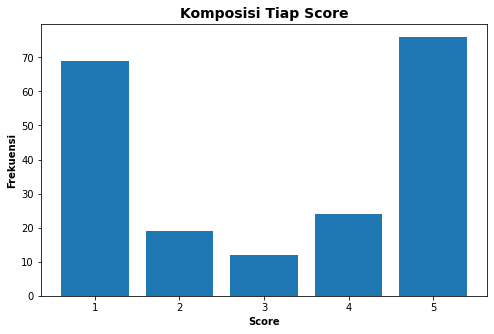

In [ ]:
#Komposisi Tiap Score dari 1 - 5
dana_score_x = dana_score.index
dana_score_y = dana_score.values

plt.figure(figsize = (8, 5))
plt.bar(dana_score_x, dana_score_y)
plt.xlabel("Score", fontweight = 'bold')
plt.ylabel("Frekuensi", fontweight = 'bold')
plt.title("Komposisi Tiap Score", fontweight = 'bold', fontsize = 14)

plt.savefig("Visualisasi Score pada Data.png")

plt.show()

#Prepocessing Data (Case Folding, Stopword Removal, Stemming)

Proses menyeleksi data text agar terstruktur tergantung dengan kondisi data text. Pada proses ini, kami menggunalan tahapan yaitu case folding, stopword removal dan stemming

##1. Case Folding

Peranan case folding merupakan proses pertama pada prepocessing data, yaitu menyamaratakan penggunaan huruf. Diantaranya:

1. Menjadikan text huruf kecil (lower case)
2. Menghapus semua karakter kecuali huruf a - z
3. Mengganti tab menjadi spasi
4. Mengganti garis baru menjadi spasi
5. Mengganti spasi yang >1 menjadi 1 spasi
6. Menghapus spasi di awal dan diakhir

In [ ]:
dana_3 = dana_2.copy()        

In [ ]:
dana_2.head()

,content,score,sentimen
0,Ancur,1,0
1,"Jaringan saya stabil, main game lancar, nonton...",1,0
2,Kenapa yah akhir2 ini dana sering eror,3,0
3,Aplikasinya ngeleg,3,0
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0


In [ ]:
for i in range(len(dana_2)):
    if type(dana_2["content"][i]) != str:
        print(str(i), "Bukan string")
        
# Sudah dalam bentuk string semua

In [ ]:
# Case Folding

def clean_content(content):
    import string, re
    
    content = content.lower() # menjadikan lowercase
    content = re.sub("[^a-z]", " ", content) # hapus semua karakter kecuali a-z
    content = re.sub("\t", " ", content) # mengganti tab dengan spasi
    content = re.sub("\n", " ", content) # mengganti new line dengan spasi
    content = re.sub("\s+", " ", content) # mengganti spasi > 1 dengan 1 spasi
    content = content.strip() # menghapus spasi di awal dan akhir 
    
    return content

In [ ]:
dana_2["content_clean"] = dana_2["content"].apply(clean_content)
dana_2.head()

,content,score,sentimen,content_clean
0,Ancur,1,0,ancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaringan saya stabil main game lancar nonton y...
2,Kenapa yah akhir2 ini dana sering eror,3,0,kenapa yah akhir ini dana sering eror
3,Aplikasinya ngeleg,3,0,aplikasinya ngeleg
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,sangat kecewa dana hilang tiba tiba dan sering...


##2. Stopword Removal

Pengertiannya yaitu kata-kata yang sering muncul didalam dokumen tidak memiliki keterkaitan dengan subjek utama. 
Contoh stopwords dalam bahasa Indonesia: yang, juga, dari, dia, kami, kamu, aku, saya, ini, itu, atau, dan, tersebut, pada, dengan, adalah, yaitu, ke, tak, tidak, di, pada, jika, maka, ada, pun, lain, saja, hanya, namun, seperti, kemudian, dll.

In [ ]:
# Sastrawi
factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()
len(stopword_sastrawi)
print(stopword_sastrawi)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
stopword_nltk = set(stopwords.words("indonesian"))
len(stopword_nltk) # Lihat berapa banyak kata yang termasuk dalam stopword NLTK

757

In [ ]:
df1 = pd.DataFrame(stopword_nltk)
df2 = pd.DataFrame(stopword_sastrawi)

common = df1.merge(df2, on = [0], how = "left")
print(common)

ga_ada = df2[(~df2[0].isin(common[0]))] # ~ -> negasi (True jadi False)
ga_ada 
# Ada 17 kata stopword di Sastrawi yang tidak ada di nltk

               0
0    mengerjakan
1          namun
2     dimisalkan
3           beri
4     ditanyakan
..           ...
755    melakukan
756       inikah
757      dimulai
758        tutur
759       segala

[760 rows x 1 columns]


,0
69,dimana
70,kemana
77,kah
81,selagi
85,kecuali
89,seraya
95,dsb
96,dst
97,dll
99,dulunya


In [ ]:
# Stopword Removal

def clean_stopword(content):
    # Stopword Sastrawi
        
    factory = StopWordRemoverFactory()
    stopword_sastrawi = factory.get_stop_words()
    
    content = content.split() # split jadi kata per kata
    content = [w for w in content if w not in stopword_sastrawi] # hapus stopwords
    content = " ".join(w for w in content) # join semua kata yang bukan stopwords

    # Stopword NLTK
    
    stopword_nltk = set(stopwords.words("indonesian"))
    stopword_nltk = stopword_nltk

    content = content.split() # split jadi kata per kata
    content = [w for w in content if w not in stopword_nltk] # hapus stopwords
    content = " ".join(w for w in content) # join semua kata yang bukan stopwords
    
    return content

In [ ]:
dana_2["content_clean"] = dana_2["content_clean"].apply(clean_stopword)
dana_2.head()

,content,score,sentimen,content_clean
0,Ancur,1,0,ancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaringan stabil main game lancar nonton youtub...
2,Kenapa yah akhir2 ini dana sering eror,3,0,yah dana eror
3,Aplikasinya ngeleg,3,0,aplikasinya ngeleg
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hilang lag sinyal bagus pas transf...


In [ ]:
word_after_stopword = pd.Series(" ".join(dana_2["content_clean"]).split())
len(word_after_stopword)

1276

In [ ]:
word_after_stopword.value_counts().nlargest(10)

dana        78
sibuk       38
sistem      34
nya         31
gangguan    28
aplikasi    26
eror        25
login       25
ga          23
perbaiki    19
dtype: int64

In [ ]:
pd.DataFrame(word_after_stopword.value_counts()).to_csv("after stopword koreksi.csv") #Save buat dikoreksi

Dikarenakan terdapat kalimat singkatan, kesalahan penulisan dan kalimat tidak baku yang dilakukan oleh pengguna Dana. Maka, untuk mempermudah proses stopwords dan stemming, akan dilakukan koreksi penulisan 

In [ ]:
# Koreksi penulisan                         

koreksi = {}
file = open("list koreksi penulisan (tambahan sendiri).txt")
for x in file:
    f = x.split(":")
    koreksi.update({f[0].strip(): f[1].strip()})
    
koreksi

{'ahir': 'akhir',
 'ancur': 'hancur',
 'apinya': 'aplikasinya',
 'apk': 'aplikasi',
 'aplikasiii': 'aplikasi',
 'apus': 'hapus',
 'atwnapa': 'atau kenapa',
 'atwpun': 'ataupun',
 'aya': 'ada',
 'bagusin': 'baguskan',
 'baguss': 'bagus',
 'balesany': 'balasannya',
 'bangat': 'banget',
 'banggat': 'banget',
 'bapuk': 'jelek',
 'baruan': 'cepat',
 'barusan': 'baru saja',
 'bbrp': 'beberapa',
 'bejuta': 'berjuta',
 'bener': 'benar',
 'bgt': 'banget',
 'bgtu': 'begitu',
 'bkan': 'bukan',
 'bknnya': 'bukannya',
 'blm': 'belum',
 'bnget': 'banget',
 'bobok': 'rusak',
 'bsa': 'bisa',
 'buru': 'cepat',
 'byk': 'banyak',
 'cepetan': 'cepat',
 'cs': 'customer service',
 'cwe': 'cewek',
 'dewek': 'kamu',
 'dg': 'dengan',
 'diperbarui': 'diperbaharui',
 'diturutin': 'diturutkan',
 'dngn': 'dengan',
 'donlod': 'download',
 'dowload': 'download',
 'dsna': 'disana',
 'duit': 'uang',
 'elor': 'error',
 'emang': 'memang',
 'emng': 'memang',
 'eror': 'error',
 'erorr': 'error',
 'erorrr': 'error',
 'erro

In [ ]:
# Koreksi Penulisan                             
# WORD BREAK (\b)

def koreksi(content):
        
    dict_koreksi = {}
    file = open("list koreksi penulisan (tambahan sendiri).txt")
    for x in file:
        f = x.split(":")
        dict_koreksi.update({f[0].strip(): f[1].strip()})
    
    for awal, pengganti in dict_koreksi.items():
        content = str(content).replace(awal, pengganti)
        content = re.sub(r"\b" + awal + r"\b", pengganti, content)
    
    return content

In [ ]:
# waktu yang diperlukan untuk running program
start_time = datetime.now()

dana_2["content_clean"] = dana_2["content_clean"].apply(koreksi)

end_time = datetime.now()
print("Durasi Koreksi Penulisan: {}".format(end_time - start_time))

Durasi Koreksi Penulisan: 0:00:00.130799


In [ ]:
dana_2.head(15)

,content,score,sentimen,content_clean
0,Ancur,1,0,hancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaringan stabil main game lancar nonton youtub...
2,Kenapa yah akhir2 ini dana sering eror,3,0,yah dana error
3,Aplikasinya ngeleg,3,0,aplikasinya lag
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hhilang lag sinyal bagus pas trans...
5,"woy kenapa dana suka erorr, ga nyaman lagi pak...",2,0,woy dana suka error ga nyaman memakai dana kal...
6,Makin lama ko mlh makin sering eror bknnya tam...,1,0,ko malah error bukannya bagus
7,"Udah diturutin logout, malah login nya yg susa...",3,0,sudah diturutkan logout login nya yg susah apl...
8,Jaringan nya eror padahal jaringan nya full aneh,1,0,jaringan nya error jaringan nya full aneh
9,Tidak terbuka aplikasi nya,1,0,buka aplikasi nya


Terdapat kata yang tidak terdapat pada stopword NLTK dan tidak ada korelasi dengan subjek utama. Maka, diperlukan stopword tambahan

In [ ]:
# Stopwords tambahan                                      
with open("list stopword baru (tambahan sendiri).txt", "r") as f: 
    stopwords_baru = f.read().splitlines()
    
stopwords_baru

['nya',
 'yg',
 'gak',
 'ja',
 'knapa',
 'bosku',
 'sayah',
 'ya',
 'ga',
 'ke',
 'sih',
 'malah',
 'mana',
 'bgtu',
 'tp',
 'aja',
 'mash',
 'koh',
 'sama',
 'kalo',
 'baya',
 'malah',
 'knp',
 'duh',
 'sihh',
 'lot',
 'bada',
 'ladan',
 'kada',
 'gimana',
 'alas',
 'aja',
 'hallo',
 'loh',
 'ap',
 'kmbali',
 'ap',
 'boz',
 'helooooo',
 'kah',
 'wagu',
 'ko',
 'stlah',
 'sush',
 'koh',
 'dong',
 'skrang',
 'tong',
 'tolonngggg',
 'emng',
 'gx',
 'padahal',
 'banggat',
 'malah',
 'ajg',
 'dr',
 'gk',
 'gw',
 'pas',
 'gini',
 'terus',
 'no',
 'udh',
 'haduh',
 'bbrp',
 'ajh',
 'knapa',
 'dah',
 'jdi',
 'jadi',
 'skarang',
 'd',
 'sy',
 'woi',
 'kalo',
 'sih',
 'kali',
 'mulu',
 'sudah',
 'terus',
 'trus',
 'nih',
 'yah',
 'dah',
 'ko',
 'ni',
 'bos',
 'knp',
 'tp',
 'banget',
 'udh',
 'tdk',
 'klo',
 'kalo',
 'gw',
 'aja',
 'gua',
 'si',
 'g',
 'sdh',
 'x',
 'blm',
 'syg',
 'koh',
 'slot',
 'bu',
 'amam',
 'sayah',
 'depo',
 'kenaapa',
 'amam',
 'lol',
 'boss',
 'n',
 'boz',
 'mw',
 'ja

In [ ]:
# Stopword Tambahan

def clean_stopword_baru(content):
    with open("list stopword baru (tambahan sendiri).txt", "r") as f: 
        stopwords_baru = f.read().splitlines()
    
    content = content.split() # split jadi kata per kata
    content = [w for w in content if w not in stopwords_baru] # hapus stopwords
    content = " ".join(w for w in content) # join semua kata yang bukan stopwords
    
    return content

In [ ]:
# Stopword removal diulang dan ditambah "tambahan stopword"

dana_2["content_clean"] = dana_2["content_clean"].apply(clean_stopword)
dana_2["content_clean"] = dana_2["content_clean"].apply(clean_stopword_baru)

In [ ]:
dana_2.head()

,content,score,sentimen,content_clean
0,Ancur,1,0,hancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaringan stabil main game lancar nonton youtub...
2,Kenapa yah akhir2 ini dana sering eror,3,0,dana error
3,Aplikasinya ngeleg,3,0,aplikasinya lag
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hhilang lag sinyal bagus transfer ...


##3. Stemming
Pengertiannya yaitu menghilangkan imbuhan pada suatu kata

In [ ]:
# Stemming Sastrawi

def clean_stem(content):
    
    factory = StemmerFactory()
    stemmer_sastrawi = factory.create_stemmer()

    content = stemmer_sastrawi.stem(content)
    
    return content

In [ ]:
# Coba lihat waktu yang diperlukan untuk running program

start_time = datetime.now()

dana_2["content_clean"] = dana_2["content_clean"].apply(clean_stem)

end_time = datetime.now()
print("Durasi Stemming: {}".format(end_time - start_time))



Durasi Stemming: 0:00:46.298549


In [ ]:
dana_2.head(10)

,content,score,sentimen,content_clean
0,Ancur,1,0,hancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaring stabil main game lancar nonton youtube ...
2,Kenapa yah akhir2 ini dana sering eror,3,0,dana error
3,Aplikasinya ngeleg,3,0,aplikasi lag
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hhilang lag sinyal bagus transfer ...
5,"woy kenapa dana suka erorr, ga nyaman lagi pak...",2,0,dana suka error nyaman pakai dana error
6,Makin lama ko mlh makin sering eror bknnya tam...,1,0,error bagus
7,"Udah diturutin logout, malah login nya yg susa...",3,0,turut logout login susah aplikasi peribuaiki b...
8,Jaringan nya eror padahal jaringan nya full aneh,1,0,jaring error jaring full aneh
9,Tidak terbuka aplikasi nya,1,0,buka aplikasi


In [ ]:
dana_2.to_csv("Setelah Di Stemming (100-100).csv", index = False)

In [ ]:
dana_2_stemming = pd.read_csv("Setelah Di Stemming (100-100).csv")
dana_2_stemming.head()

,content,score,sentimen,content_clean
0,Ancur,1,0,hancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaring stabil main game lancar nonton youtube ...
2,Kenapa yah akhir2 ini dana sering eror,3,0,dana error
3,Aplikasinya ngeleg,3,0,aplikasi lag
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hhilang lag sinyal bagus transfer ...


In [ ]:
# Hapus teks NAN
content_nan = dana_2_stemming[dana_2_stemming["content_clean"].isnull()]
content_nan.head()

,content,score,sentimen,content_clean
131,Sangat baik,5,1,NaN
135,👍,5,1,NaN
137,ok,5,1,NaN
143,Oke,5,1,NaN
150,Ok,5,1,NaN


In [ ]:
content_isi = dana_2_stemming[~dana_2_stemming["content_clean"].isnull()]

In [ ]:
print(len(content_nan))
print(len(content_isi))

7
193


In [ ]:
content_isi["sentimen"].value_counts()

#Bisa dianggap balance karena hampir 1:1 (50%-50%)

0    100
1     93
Name: sentimen, dtype: int64

In [ ]:
content_isi.head()

,content,score,sentimen,content_clean
0,Ancur,1,0,hancur
1,"Jaringan saya stabil, main game lancar, nonton...",1,0,jaring stabil main game lancar nonton youtube ...
2,Kenapa yah akhir2 ini dana sering eror,3,0,dana error
3,Aplikasinya ngeleg,3,0,aplikasi lag
4,Sangat kecewa dana hilang tiba tiba dan sering...,3,0,kecewa dana hhilang lag sinyal bagus transfer ...


#Word Cloud Sentimen (Data Sesudah Diolah)

In [ ]:
stopwords_dana_2 = ["dana", "aplikasi"]

def clean_dana_2(text):
    temp = text.split() # split words
    temp = [w for w in temp if not w in stopwords_dana_2] # remove stopwords
    temp = " ".join(word for word in temp) # join all words

    return temp

content_isi["content_clean_hasil"] = content_isi["content_clean"].apply(clean_dana_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
content_isi.to_csv("Fix Setelah Preprocessing.csv", index = False)

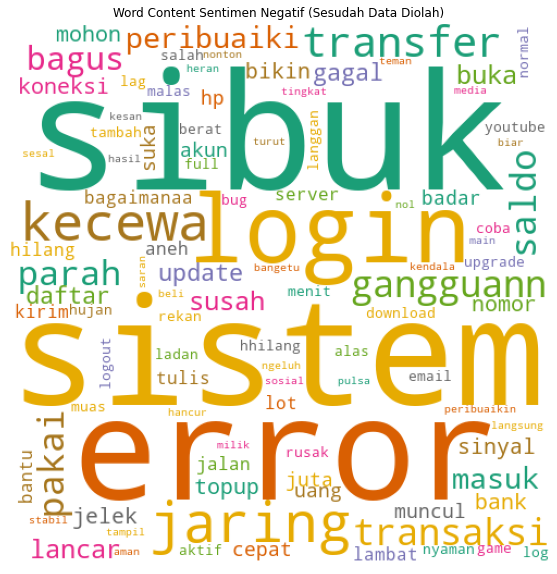

In [ ]:
# 1. WORDCLOUD CONTENT SENTIMEN NEGATIF (SESUDAH DIOLAH)

word_after_negatif = pd.Series(" ".join(content_isi[content_isi["sentimen"] == 0]["content_clean_hasil"].astype("str")).split())
dat_after_negatif = " ".join(word_after_negatif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_negatif = WordCloud(background_color = "white", mode = "RGB", width = 500, height = 500, colormap = "Dark2", collocations = False, max_words = 100).generate(dat_after_negatif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Negatif (Sesudah Data Diolah)")
plt.imshow(wordcloud_negatif)
plt.axis("off")

plt.show()

Berdasarkan wordcloud yang diperoleh, frekuensi kata yang sering muncul di sentimen negatif atau bintang 1,2,3 adalah sistem error, sibuk, login, dll.

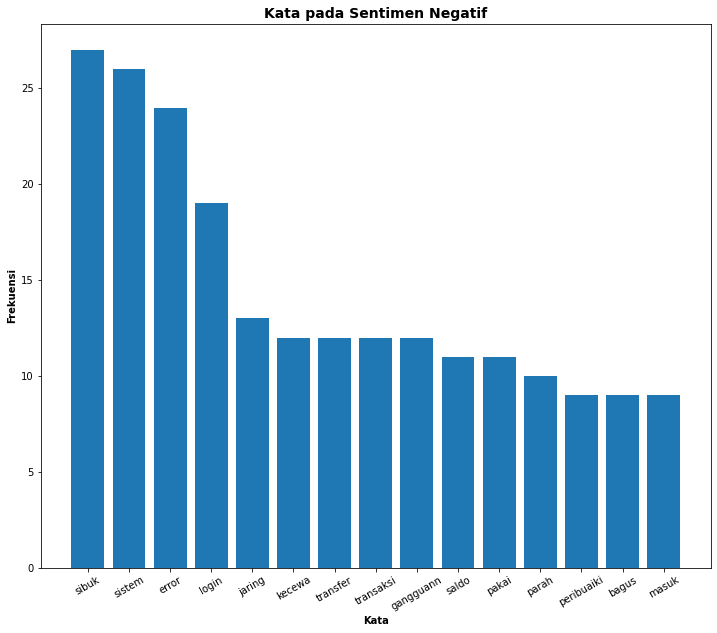

In [ ]:
# SENTIMEN NEGATIF

negatif_kata = word_after_negatif.value_counts().nlargest(15)

negatif_x = negatif_kata.index
negatif_y = negatif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(negatif_x, negatif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Negatif", fontweight ='bold', fontsize = 14)

plt.xticks(negatif_x, rotation = 30)

plt.show()

Dapat dilihat pada grafik untuk analisis sentimen negatif pengguna Dana, kata yang sering dikeluarkan pengguna adalah sibuk, sistem error, masalah login, masalah jaringan, gangguan transaksi

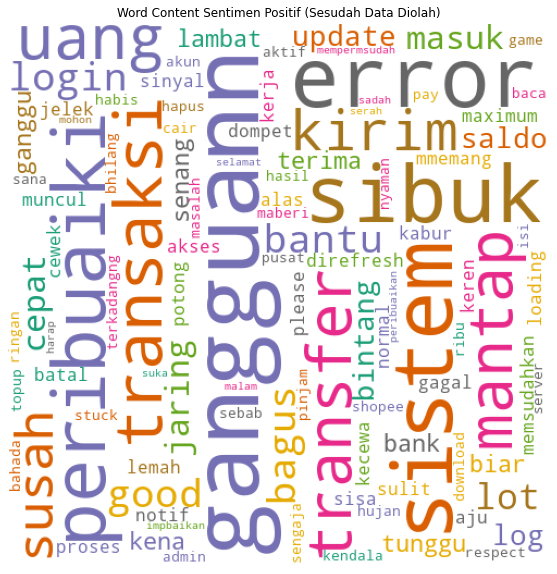

In [ ]:
# 2. WORDCLOUD CONTENT SENTIMEN POSITIF (SESUDAH DIOLAH)

word_after_positif = pd.Series(" ".join(content_isi[content_isi["sentimen"] == 1]["content_clean_hasil"].astype("str")).split())
dat_after_positif = " ".join(word_after_positif)

%matplotlib inline
# Unigram (per satu kata) -> "collocations = False"
wordcloud_positif = WordCloud(background_color = "white", mode = "RGB", width = 500, height = 500, colormap = "Dark2", collocations = False, max_words = 100).generate(dat_after_positif)
plt.figure(figsize = (20, 10))
plt.title("Word Content Sentimen Positif (Sesudah Data Diolah)")
plt.imshow(wordcloud_positif)
plt.axis("off")

plt.show()

Berdasarkan wordcloud yang diperoleh, frekuensi kata yang sering muncul di sentimen positif atau bintang 4, 5 adalah gangguan, transaksi, mantap, dll.

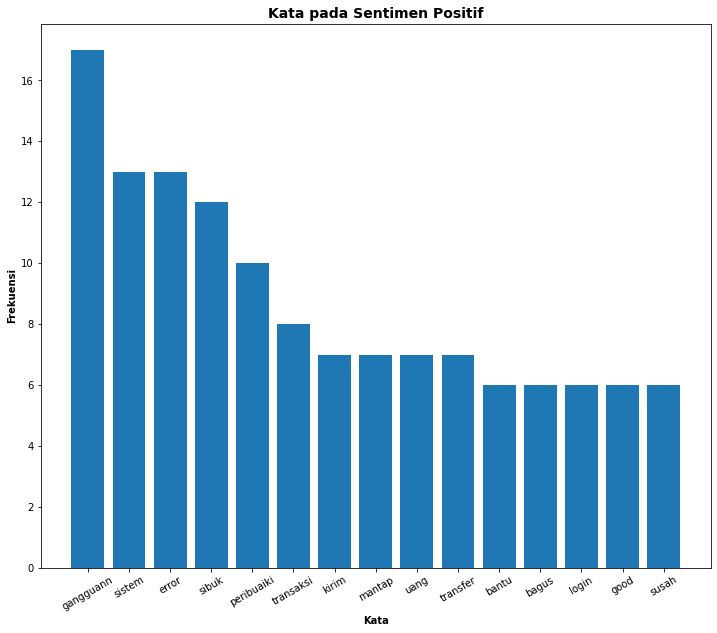

In [ ]:
# SENTIMEN POSITIF

positif_kata = word_after_positif.value_counts().nlargest(15)

positif_x = positif_kata.index
positif_y = positif_kata.values

plt.figure(figsize = (12, 10))
plt.bar(positif_x, positif_y)
plt.xlabel("Kata", fontweight ='bold')
plt.ylabel("Frekuensi", fontweight ='bold')
plt.title("Kata pada Sentimen Positif", fontweight ='bold', fontsize = 14)

plt.xticks(positif_x, rotation = 30)

plt.show()

Dapat dilihat berdasarkan grafik, kata yang sering diucapkan users adalah gangguan, sistem error, sibuk. Walaupun, users memberikan bintang 5 tetapi ulasan tidak sesuai. Untuk kata yang positif diantaranya mantap, bagus, dll.

#Modelling dan Evaluation

TF-IDF

In [ ]:
X = content_isi["content_clean_hasil"]       
y = content_isi["sentimen"]

In [ ]:
print(X.shape) 
print(y.shape)

(193,)
(193,)


In [ ]:
#K-FOLD CROSS VALIDATION
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

print(X.shape) 

(193, 238)


In [ ]:
#K-FOLD CROSS VALIDATION
#Modeling dan Evaluasi

#Model menggunakan SVC (SVM Classification)
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

#CROSS VAL
from sklearn.model_selection import cross_val_score
accuracies_svc = cross_val_score(estimator = svc, X = X, y = y, cv = 10)
print("Nilai Akurasi SVM 10-Fold: {:.2f}%".format(accuracies_svc.mean() * 100))

Nilai Akurasi SVM 10-Fold: 61.11%


In [ ]:
list_akurasi = list(accuracies_svc * 100)
list_akurasi

[75.0,
 55.00000000000001,
 60.0,
 73.68421052631578,
 42.10526315789473,
 57.89473684210527,
 52.63157894736842,
 57.89473684210527,
 68.42105263157895,
 68.42105263157895]

In [ ]:
list_akurasi2 = []
for i in list_akurasi:
    list_akurasi2.append(round(i, 2))

list_akurasi2

[75.0, 55.0, 60.0, 73.68, 42.11, 57.89, 52.63, 57.89, 68.42, 68.42]

In [ ]:
np.array(list_akurasi2).mean() # Hasilnya sama

61.104

In [ ]:
# Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(svc, X, y, cv = 10)
conf_mat = confusion_matrix(y, y_pred)

In [ ]:
conf_mat

array([[70, 30],
       [45, 48]])

In [ ]:
(70 + 48) / (70 + 48 + 45 + 30) #Hasil dengan accuracy sama

0.6113989637305699

Analisis sentiment dengan data pada teks yang telah dibersihkan, dengan menggunakan model ML Linear SVC. Untuk vectorizernya akan digunakan TfidfVectorizer. Nilai akurasi yang didapatkan yaitu 61%, artinya nilai rendah disebabkan karena word normalizer atau pada koreksi kata tambahan tidak maksimal, sehingga penggunaan kata tidak baku dan kesalahan penulisan
kata maupun singkatan pada kebiasaan pengguna Dana tidak ditangani dengan baik

#Prediksi Sentimen

In [ ]:
#Data yang akan di tes
def prediksi_sentimen(df_content):
    # 1. membersihkan content
    df_content = df_content.apply(clean_content)
    
    # 2. koreksi penulisan
    df_content = df_content.apply(koreksi)
    
    # 3. hapus stopwords
    df_content = df_content.apply(clean_stopword)
    df_content = df_content.apply(clean_stopword_baru)
    
    # 4. stemming
    df_content = df_content.apply(clean_stem)
    
    # 5. hapus stopword tokped
    df_content = df_content.apply(clean_dana_2)
    
    # 6. vectorizer
    df_content = vectorizer.transform(df_content)
    
    # 7. predict
    from sklearn.svm import SVC
    svc = SVC(kernel = "linear")
    svc.fit(X, y)
    pred_sentimen = svc.predict(df_content)
    
    return pred_sentimen

In [ ]:
list_coba_review = ["Bagus",
                    "Transfer membantu", 
                    "Mantap",
                    "Sistem error", 
                    "login gagal"]

df_coba_review = pd.DataFrame(list_coba_review, columns = ["coba_review"])
df_coba_review

,coba_review
0,Bagus
1,Transfer membantu
2,Mantap
3,Sistem error
4,login gagal


In [ ]:
# score pada rating Dana <= 3 -> negatif (0)
# score pada rating Dana > 3 -> positif (1)
prediksi_sentimen(df_coba_review["coba_review"])

array([1, 1, 1, 0, 0])

Maka, didapatkan hasi prediksi dengan memasukan reviews berupa:
- Bagus yaitu sentimen 1 (positif)
- Transfer membantu yaitu sentimen 1 (positif)
- Mantap yaitu sentimen 1 (positif)
- Sistem error yaitu sentimen 0 (negatif)
- login gagal yaitu sentimen 0 (negatif)


#Kesimpulan:
- Pada tahapan data acquisition, menggunakan teknik scraping pada Google Play Store yang bertujuan untuk pengambilan data secara otomatis dari reviews pengguna aplikasi Dana, dengan jumlah 600 dataset
- Setelah itu melakukan data exploration hasil dari google scraping, dan menggunakan sampling 100 100 dataset untuk sentimen positif dan negatifnya
- Tahap selanjutnya yaitu prepocessing data, proses menyeleksi data text agar terstruktur tergantung dengan kondisi data text. Pada proses ini, kami menggunalan tahapan yaitu case folding, stopword removal dan stemming
- Untuk mengetahui frekuensi kata yang sering muncul pada ulasan. Maka, dilakukan WordCloud untuk sentimen positif dan negatifnya
- Pada tahap modelling, menggunakan model ML Linear SVC. Untuk vectorizernya digunakan TfidfVectorizer. Nilai akurasi yang didapatkan yaitu 61%, artinya nilai rendah disebabkan karena word normalizer atau pada koreksi kata tambahan tidak maksimal, sehingga penggunaan kata tidak baku dan kesalahan penulisan kata maupun singkatan pada kebiasaan pengguna Dana tidak ditangani dengan baik
- Tahap terakhir, melakukan prediksi dengan memasukan reviews dan didapatkan sentimen yang sesuai

Referensi:

https://dqlab.id/tahapan-text-preprocessing-dalam-teknik-pengolahan-data

https://text-id.123dok.com/document/wyek5jvry-data-cleaning-tokenisasi-case-folding-penghilangan-stopword-stemming.html

https://eksplora.stikom-bali.ac.id/index.php/eksplora/article/download/390/182/